# Assignment 2

## Linear and Sparse Regression

*Submission from 18EE10043, Rhitvik Sinha*  
*Performed in Google Colab*

In [1]:
!ls

'Advertising Dataset.csv'   sample_data


In [2]:
import numpy as np
import pandas as pd

df=pd.read_csv('Advertising Dataset.csv', sep=',',header=None)
df.head()

,0,1,2,3,4
0,NaN,TV,radio,newspaper,sales
1,1.0,230.1,37.8,69.2,22.1
2,2.0,44.5,39.3,45.1,10.4
3,3.0,17.2,45.9,69.3,9.3
4,4.0,151.5,41.3,58.5,18.5


In [3]:
df = df.drop(0)
df = df.drop(0, axis=1)

data = df.to_numpy(dtype='float')
data[:5]

array([[230.1,  37.8,  69.2,  22.1],
       [ 44.5,  39.3,  45.1,  10.4],
       [ 17.2,  45.9,  69.3,   9.3],
       [151.5,  41.3,  58.5,  18.5],
       [180.8,  10.8,  58.4,  12.9]])

In [4]:
features = np.copy(data[:, :3])
labels = np.copy(data[:, -1]).reshape((-1, 1))

print(features[:10])
print(labels[:10])
labels.shape[0]

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]
 [  8.7  48.9  75. ]
 [ 57.5  32.8  23.5]
 [120.2  19.6  11.6]
 [  8.6   2.1   1. ]
 [199.8   2.6  21.2]]
[[22.1]
 [10.4]
 [ 9.3]
 [18.5]
 [12.9]
 [ 7.2]
 [11.8]
 [13.2]
 [ 4.8]
 [10.6]]


200

## Part 1

*Randomly divide the dataset into training (75%) and testing (25%) subsets.*

In [5]:
train_features = []
test_features = []

train_labels = []
test_labels = []

for i in range(labels.shape[0]):
    if np.random.rand() < 0.75 :
        train_features.append(features[i,:])
        train_labels.append(labels[i])
    else:
        test_features.append(features[i,:])
        test_labels.append(labels[i])

In [6]:
train_features = np.array(train_features)
test_features = np.array(test_features)

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

print(train_features.shape)
print(train_labels.shape)
print(test_features.shape)
print(test_labels.shape)

(147, 3)
(147, 1)
(53, 3)
(53, 1)


## Part 2

*Using Linear Regression, fit a model to predict the sales from investments using your own formula. Compare the coefficients as found by the python library function.*

In [7]:
X_train_mean = np.mean(train_features, axis=0).reshape(1,-1)
y_train_mean = np.mean(train_labels, axis=0)

print(X_train_mean)
print(y_train_mean)

[[148.14217687  23.07619048  29.78435374]]
[14.02244898]


In [8]:
numerator = np.dot((train_features - X_train_mean).T, (train_labels - y_train_mean))
print(numerator.shape)
denominator = np.dot((train_features - X_train_mean).T, (train_features - X_train_mean))
print(denominator.shape)
denom_inv = np.linalg.inv(denominator)

w = np.dot(denom_inv, numerator)
b = y_train_mean - np.dot(X_train_mean, w)

print()
print(w.shape)
print(w)
print(b.shape)
print(b)

(3, 1)
(3, 3)

(3, 1)
[[ 0.04455704]
 [ 0.19217871]
 [-0.00572183]]
(1, 1)
[[3.15734077]]


In [9]:
from sklearn.linear_model import LinearRegression as LR

linear_model = LR().fit(train_features, train_labels)

print(linear_model.coef_)
print(linear_model.intercept_)

[[ 0.04455704  0.19217871 -0.00572183]]
[3.15734077]


## Part 3

*Compute the mean squared error on the testing set.*

In [10]:
mse_linear_train = np.dot( (train_labels - np.dot(train_features, w) - b).T, (train_labels - np.dot(train_features, w) - b) ) / train_labels.shape[0]
mse_linear_test = np.dot( (test_labels - np.dot(test_features, w) - b).T, (test_labels - np.dot(test_features, w) - b) ) / test_labels.shape[0]

print(mse_linear_train)
print(mse_linear_test)

[[3.02069861]]
[[2.20705911]]


## Part 4

*Using ridge regression with different values of lambda (0.5, 1, 5, 10, 50, 100) plot the coefficients against each other, and also compare the test set mean squared errors.*

In [11]:
lamda = [0.5, 1, 5, 10, 50, 100]
denom_inv_ridge = []
w_ridge = []
b_ridge = []

for i in lamda:
    
    denom_i = np.linalg.inv(denominator + (i * np.eye(train_features.shape[1])))
    denom_inv_ridge.append(denom_i)
    
    w_i = np.dot(denom_i, numerator)
    w_ridge.append(w_i)

    b_i = y_train_mean - np.dot(X_train_mean, w_i)
    b_ridge.append(b_i)

denom_inv_ridge = np.array(denom_inv_ridge)
w_ridge = np.array(w_ridge)
b_ridge = np.array(b_ridge)

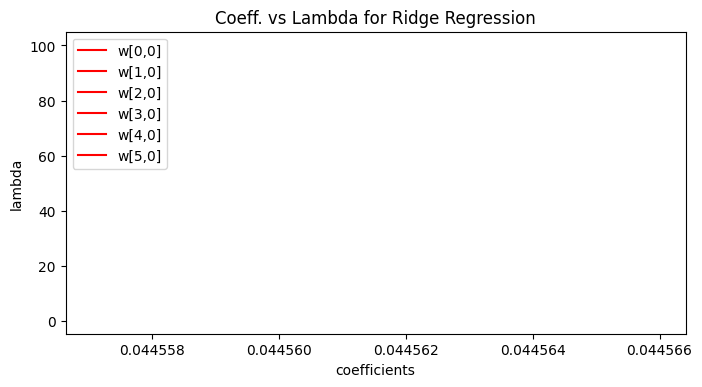

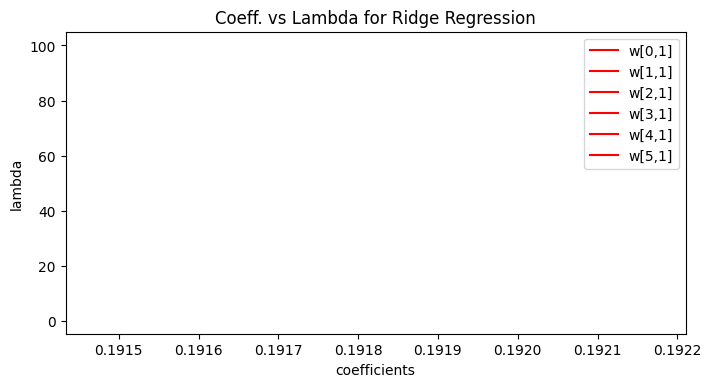

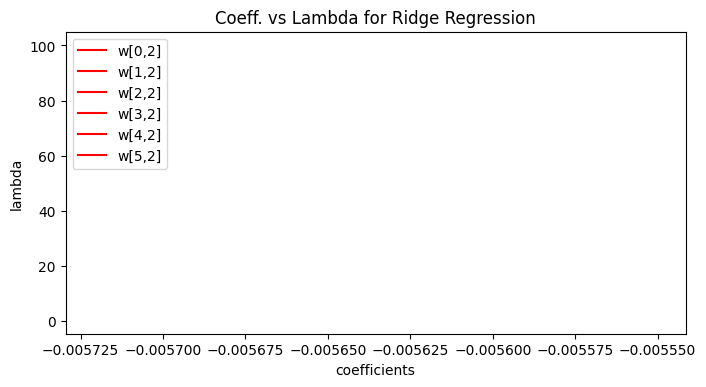

In [12]:
import matplotlib.pyplot as plt

for j in range(w_ridge.shape[1]):
    fig, ax = plt.subplots(figsize = (8, 4), dpi = 100)
    
    for i, num in enumerate(lamda):
        ax.plot(w_ridge[i, j], num, 'r', label = 'w['+ str(i) +','+ str(j) +']', markersize=15)
    
    ax.set_xlabel('coefficients')
    ax.set_ylabel('lambda')
    ax.legend(loc='best')
    ax.set_title('Coeff. vs Lambda for Ridge Regression')

plt.show()

In [13]:
mse_ridge_test = []

for i, num in enumerate(lamda):
    mse_ridge_test.append(np.dot( (test_labels - np.dot(test_features, w_ridge[i]) - b_ridge[i]).T, (test_labels - np.dot(test_features, w_ridge[i]) - b_ridge[i]) ) / test_labels.shape[0])

mse_ridge_test = np.array(mse_ridge_test)
print(mse_ridge_test)

[[[2.2070386 ]]

 [[2.2070181 ]]

 [[2.20685429]]

 [[2.20665011]]

 [[2.20503977]]

 [[2.20308411]]]
